# Gold Price Predictor

• Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Loading the Dataset

In [25]:
df = pd.read_csv('E:\ML_Projects_New\Gold Price Predictor\gld_price_data.csv',parse_dates=['Date'])

In [26]:
#first five rows
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
#last 
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


# Exploratory Data Analysis

In [28]:
df.dtypes

Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object

• No type conversion is needed as of now for the dataset

In [29]:
#number of rows and columns 
df.shape

(2290, 6)

• There are 2290 rows and 6 columns in the dataset

In [30]:
#Getting some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [31]:
#cheking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

• There are no missing values in the dataset

In [32]:
#getting statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [57]:
#Checking for the duplicated values
df.duplicated(keep='last').value_counts()

False    2290
dtype: int64

• There are no duplicated values in the dataset

<AxesSubplot:xlabel='Date', ylabel='GLD'>

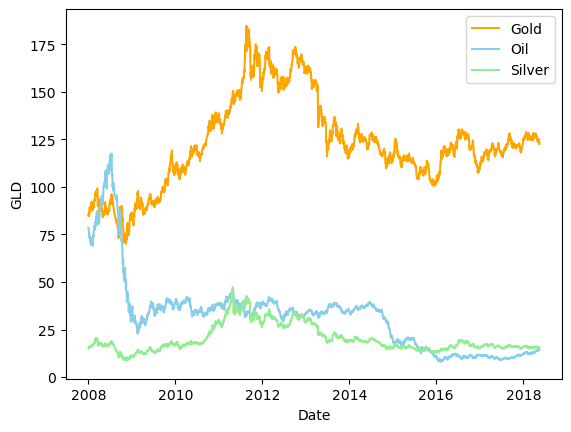

In [75]:
sns.lineplot(data=df, x="Date", y="GLD", color='orange', legend='auto', label='Gold')
sns.lineplot(data=df, x="Date", y="USO", color='skyblue', legend='auto', label='Oil')
sns.lineplot(data=df, x="Date", y="SLV", color='lightgreen', legend='auto', label='Silver')

• As the Rate of Oil increases the rate of Gold and Silver decreases and vice versa.
• Rate of Gold peaked in the year 2011-2012 and then a steady decline and rise in the rates.

# Finding Correlation in the Data

In [33]:
#correlation
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [34]:
correlation = df.corr()

<AxesSubplot:>

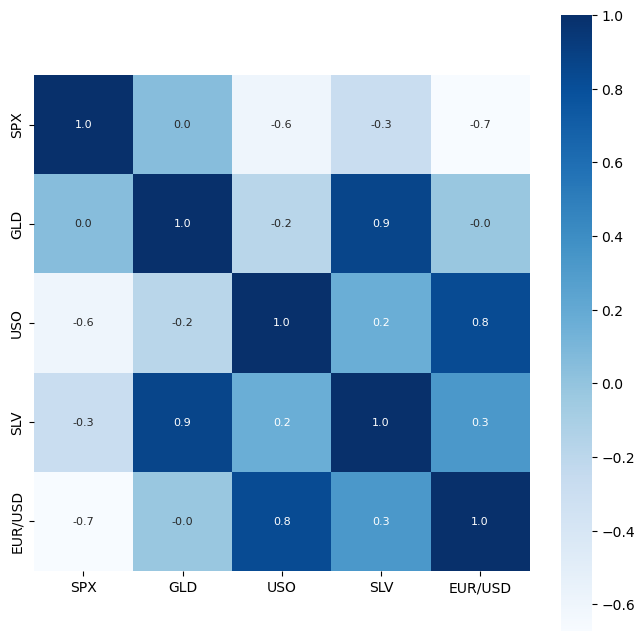

In [35]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [36]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

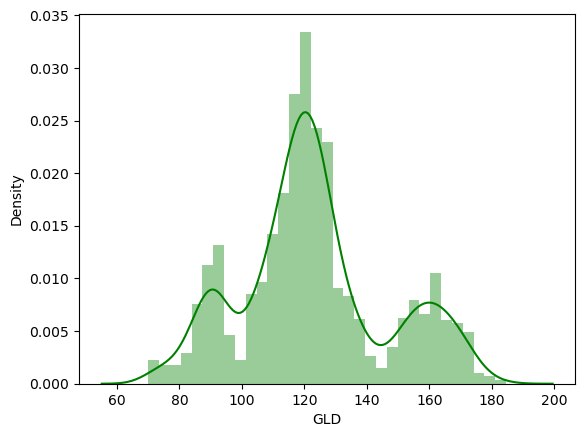

In [37]:
#Checking the distribution of the Gold Price
sns.distplot(df['GLD'], color='green', kde=True)

C:\Users\Nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='USO', ylabel='Density'>

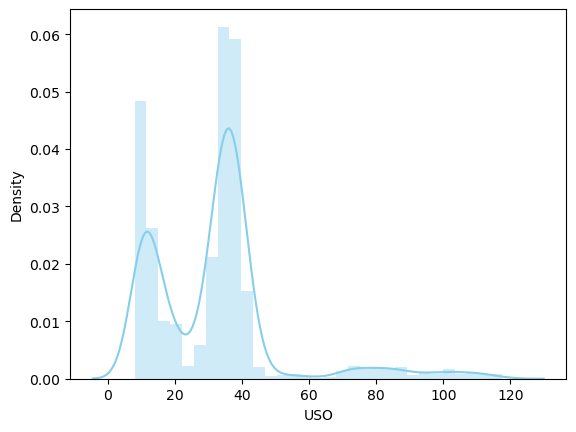

In [77]:
#Checking the distribution of the Silver Price
sns.distplot(df['USO'], color='skyblue', kde=True)

C:\Users\Nehak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPX', ylabel='Density'>

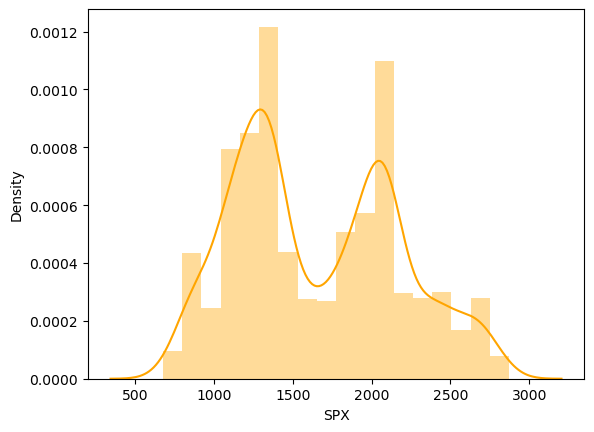

In [78]:
#Checking the distribution of the SPX Price
sns.distplot(df['SPX'], color='Orange', kde=True)

# Model Building

In [38]:
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [39]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [40]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [42]:
#splitting into Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Training

In [43]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100)

In [44]:
#training the model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
#evaluating the model
y_pred = rf.predict(X_test)

In [46]:
print(y_pred)

[168.51249941  81.95649987 116.07120063 127.60720111 120.59070127
 154.73689737 150.55409846 126.10990059 117.38189859 126.01530041
 116.44490079 171.60750105 142.01999775 167.89179841 115.26139986
 117.39670052 138.60650314 169.85570119 159.33320321 158.52479976
 155.05070047 125.55410048 175.83689966 157.22940401 125.10970043
  93.7382999   77.92829978 120.54819983 119.16259953 167.39760021
  88.28060037 125.30040028  91.18450092 117.64520028 121.12139902
 136.58260108 115.3971014  115.04820078 148.58620028 107.03750066
 104.35580257  87.2165979  126.43100051 118.14529946 153.5038991
 119.68860003 108.34260043 108.28859798  93.26280095 127.11919737
  74.88210067 113.56949899 121.25250027 111.11739903 118.73449881
 120.71069935 159.2511993  167.33490053 146.79309663  85.92419875
  94.16520019  86.86259894  90.55039993 118.93290077 126.38600075
 127.61770008 169.58540005 122.31939935 117.45419902  98.5098006
 168.11040207 143.34889806 131.79940181 121.25560203 120.62529983
 119.5963008

In [47]:
#R squared error
error_score = metrics.r2_score(y_test, y_pred)
print('R squared error: ', error_score)

R squared error:  0.9892240767116196


In [48]:
#compare the actual value and predicted values in a plot
Y_test = list(y_test)


[]

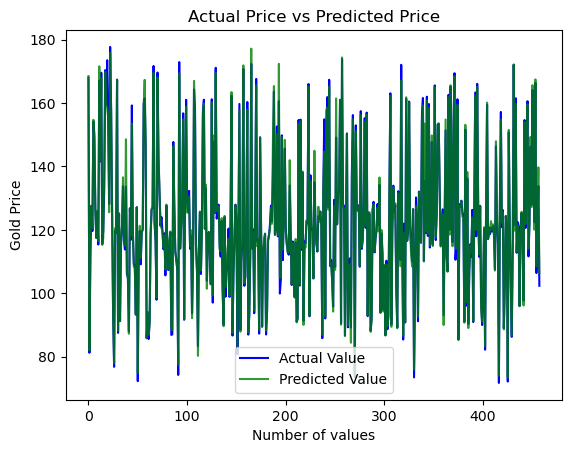

In [53]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value', alpha=0.8)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.plot()